<a href="https://colab.research.google.com/github/Livcrst/LaCCAN/blob/master/Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
dataOut = pd.read_csv('/content/Data out.csv')

In [ ]:
dataOut.head()

,p,C(p)/C(0),L(p)/L(0)
0,0.316228,0.365653,0.402998
1,0.323594,0.332482,0.399664
2,0.331131,0.322372,0.398291
3,0.338844,0.352612,0.401317
4,0.346737,0.296694,0.398739


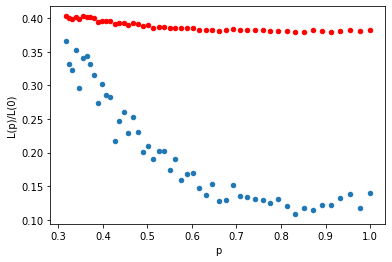

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

ax = plt.gca()

dataOut.plot(kind='scatter', x='p',y='C(p)/C(0)', ax=ax)
dataOut.plot(kind='scatter', x='p',y='L(p)/L(0)',color = 'red', ax=ax)
plt.show()

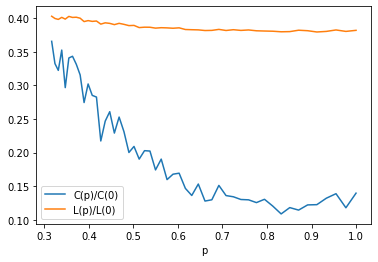

In [ ]:
ax = plt.gca()


dataOut.plot(kind='line', x='p',y='C(p)/C(0)', ax=ax)
dataOut.plot(kind='line', x='p',y='L(p)/L(0)',ax=ax)
plt.show()

In [ ]:
import networkx as nx #para criar o grafo
from scipy.stats import poisson #import da disttribuição poisson
import matplotlib.pyplot as plotar #para plotar meus grafos 
import seaborn as sn #Para plotar as distribuições
import pandas as pd 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataSamples = pd.read_csv('/content/protein.edgelist.txt',header=None)

In [ ]:
print(dataSamples)

               0
0        0\t1050
1         1\t229
2         2\t229
3         3\t467
4        4\t1228
...          ...
2925  1972\t1972
2926  1982\t2016
2927  1989\t1989
2928  2000\t2000
2929  2017\t2017

[2930 rows x 1 columns]


Fim
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225

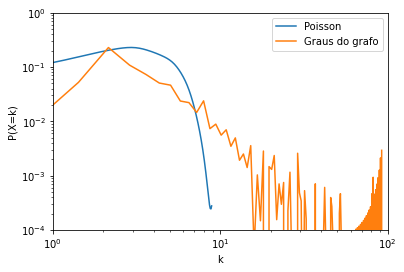

In [ ]:
dados = open ('/content/protein.edgelist.txt') 

def tratarDados(dados):
    #Percorrendo para salvar os dados do arquivo para 
    TratarDados = []
    for i in dados:
        dado = i.rstrip()
        TratarDados.append(dado)
    print('Fim')
    #Separa os valores pelo \t
    teste = []
    for j in TratarDados:
        valor = j.split('\t')
        teste.append(valor)

    #Para pegar os vertices que li do arquivo 
    vertices = []
    #Para pegar as arestas 
    arestas = []
    for i in range(len(teste)):
        n = teste[i]
        vertice1 = int(n[0])
        vertice2 = int(n[1])
        aresta = (vertice1,vertice2)
        aresta2 = (vertice2,vertice1)
        if vertice1 not in vertices:
            vertices.append(vertice1)
        if aresta or aresta2 not in arestas:
            arestas.append(aresta)
        else:
            pass
    print(vertices)
    print('ARESTAS')
    print(arestas)

    #Criando a rede
    Rede = nx.Graph()
    Rede.add_nodes_from(vertices)
    Rede.add_edges_from(arestas)

    dados.close()
    return Rede

def PegarGrausDeVertice(grafo): #Função que pega o grau de cada vértice
    graus = []
    Lista_de_Nós = list(grafo.nodes())
    for i in range(len(Lista_de_Nós)): #Com esse for consigo pegar a lista de graus dos vertices
        aux = nx.degree(grafo,i)
        graus.append(aux)
    return graus

def PlotarGraficoDistribuição(grafo): #Essa função está plotando sem transformar em dist binomial.
    GrausParaDist = PegarGrausDeVertice(grafo)
    valorP = poisson.rvs(3, size = 100)
    sn.distplot(valorP, hist = False, label= 'Poisson')
    sn.distplot(GrausParaDist, hist= False, label= 'Graus do grafo' )
    plotar.xscale('log')
    plotar.yscale('log')
    plotar.xlim(xmax= 10**2, xmin= 10**0 )
    plotar.ylim(ymax = 10**0, ymin = 10**-4 )
    plotar.xlabel('k')
    plotar.ylabel('P(X=k)')
    plotar.legend()
    plotar.show()

GrafoUso = tratarDados(dados)
PlotarGraficoDistribuição(GrafoUso)